# Dataset:
    
Telecom Churn Prediction Dataset
- Description: Contains customer information for a subscription-based service provider to predict customer churn (leaving the service).
- Columns: Includes customer details, services used, contract terms, and churn status.
- Purpose: Used for customer churn analysis, segmentation, and retention strategies.
- Applications: Churn prediction, customer satisfaction analysis, and targeted marketing.
- Analysis Tasks: EDA, data preprocessing, ML model building, evaluation, and model deployment.
- Relevance: A practical dataset for real-world data science and customer relationship management scenarios.

# Step 1: Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Step 2: Uploading Dataset

In [3]:
telecom_cust = pd.read_csv(r"C:\Python\Telco_Customer_Churn.csv")

# Step 3: Data Preprocessing

In [4]:
telecom_cust.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
telecom_cust.shape

(7043, 21)

In [6]:
telecom_cust.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
telecom_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [9]:
telecom_cust.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
telecom_cust.dropna(inplace = True)    # Removing missing values

In [11]:
# Copying dataset into different variable
df = telecom_cust.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
del df["customerID"]

In [33]:
# There are some blankspaces in the 'Totalcharges' column which we're replacing with null values here
df['TotalCharges'].replace(' ', np.nan, inplace=True)

In [39]:
 df['TotalCharges'].isnull().sum()  #total 11 nan values were found however i double compiled it that's why it's showing 0 here

0

In [40]:
df=df.dropna()

In [43]:
# converting type oftotalcharges column into float as it was counted into object columns

In [19]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [20]:
df1 = df.select_dtypes(include = "number")

In [21]:
df1.shape

(7032, 4)

In [41]:
# before droping nan values theshape of the data was '7043' however it's now changes into 7032 total 11values dropped

In [42]:
# here we're applying lable encoder over onbject-oriented columns

In [22]:
df2 = df.select_dtypes(include = "object")

In [24]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [26]:
df2.head(5)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [27]:
for col in df2.columns :
    df2[col] = LE.fit_transform(df2[col])

In [28]:
df2.head(5)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [30]:
df2.shape

(7032, 16)

In [31]:
df1 = pd.concat([df2,df1],axis=1)

In [32]:
df1.shape

(7032, 20)

<Axes: >

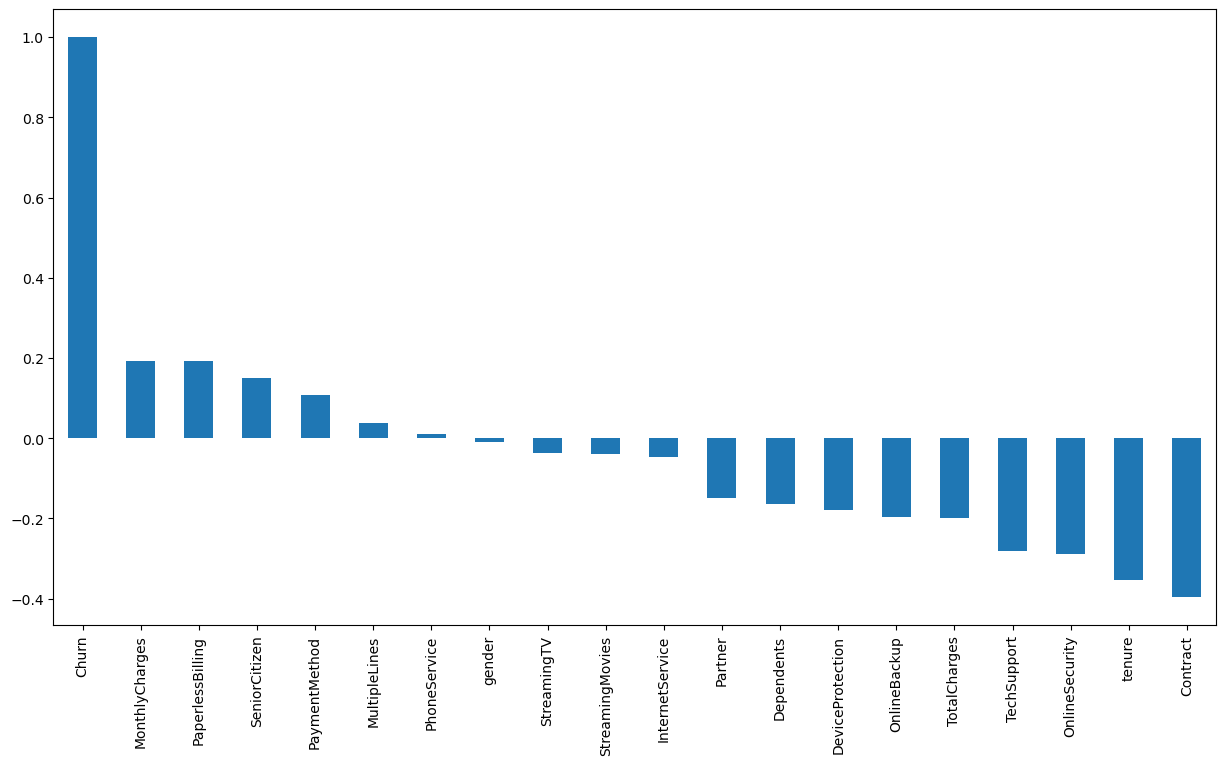

In [45]:
plt.figure(figsize=(15,8))
df1.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

# Data Exploration

## a.Gender distribution

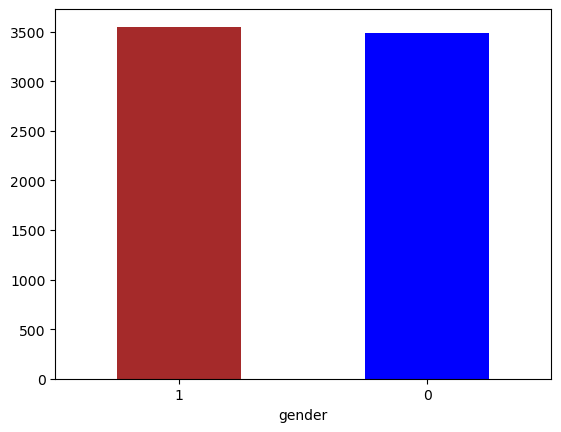

In [56]:
colors = ['brown', 'blue']
gender_counts = df1['gender'].value_counts()
ax = (gender_counts).plot(
    kind='bar',
    stacked=True,
    rot=0,
    color=colors
)

In [86]:
# Wecan conclude here that almost half are male and half are female

# Predictive modelling

## Logistic algorithum 

In [57]:
x = df1.drop("Churn", axis=1)

In [58]:
y = df1["Churn"]

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=45)

In [60]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(x_train,y_train)

In [61]:
result

LogisticRegression()

In [65]:
from sklearn.metrics import classification_report
pred_test = model.predict(x_test)

In [66]:
print (metrics.accuracy_score(y_test, pred_test))

0.7928909952606635


In [68]:
cla = classification_report(y_test,pred_test)
cla

'              precision    recall  f1-score   support\n\n           0       0.83      0.90      0.86      1552\n           1       0.64      0.50      0.56       558\n\n    accuracy                           0.79      2110\n   macro avg       0.74      0.70      0.71      2110\nweighted avg       0.78      0.79      0.78      2110\n'

## Random forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=56)
model_rf = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=50, max_leaf_nodes=30)
model_rf.fit(x_train, y_train)

RandomForestClassifier(max_leaf_nodes=30, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=50)

In [73]:
rediction_test = model_rf.predict(x_test)
print(metrics.accuracy_score(y_test, pred_test))

0.628436018957346


In [87]:
cla = classification_report(y_test,pred_test)
cla

'              precision    recall  f1-score   support\n\n           0       0.81      0.79      0.80      1548\n           1       0.47      0.50      0.48       562\n\n    accuracy                           0.72      2110\n   macro avg       0.64      0.65      0.64      2110\nweighted avg       0.72      0.72      0.72      2110\n'

## DecisionTree

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=78)

In [79]:
dt_model=DecisionTreeClassifier()

In [81]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [84]:
pred_test=dt_model.predict(x_test)

In [85]:
cla=classification_report(y_test,pred_test)
cla

'              precision    recall  f1-score   support\n\n           0       0.81      0.79      0.80      1548\n           1       0.47      0.50      0.48       562\n\n    accuracy                           0.72      2110\n   macro avg       0.64      0.65      0.64      2110\nweighted avg       0.72      0.72      0.72      2110\n'